# Summary of cortical connectivity maps for parcels 
Note that most functionality for the estimation and summarizing 
cortical connectivity models in in ```cortical_cerebellar_connectivity``` repro 

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import cortico_cereb_connectivity as ccc
import cortico_cereb_connectivity.scripts.script_summarize_weights as csw
import ProbabilisticParcellation.util as ut

conn_dir = ut.base_dir + '/Cerebellum/connectivity/maps/'


### Summarize the connectivity maps based on Cerebellar ROIs
This produces the summarizing parcel files (pscalar.nii) in ```conn_dir```. 


In [ ]:
csw.make_avrg_weight('Demand','A8')
csw.make_avrg_weight('HCP','A-2')
csw.make_avrg_weight('IBC','A6')
csw.make_avrg_weight('MDTB','A8')
csw.make_avrg_weight('Somatotopic','A8')
csw.make_avrg_weight('WMFS','A8')
csw.make_avrg_weight('Nishimoto','A10')
csw.make_avrg_weight('Fusion','05')
csw.make_avrg_weight('Fusion','06')

### Summarize for MSHBM_Prior_15_fsLR32 networks

In [2]:
T = csw.make_weight_table(dataset="Fusion",extension="06",cortical_roi="MSHBM_Prior_15_fsLR32")

In [6]:
T

,cereb_region,fs_region,hemisphere,sizeR,totalW,weight
0,M1L,VIS-P,L,2170,0.936911,0.000432
1,M2L,VIS-P,L,2170,0.356215,0.000164
2,M3L,VIS-P,L,2170,0.348928,0.000161
3,M4L,VIS-P,L,2170,0.213459,0.000098
4,A1L,VIS-P,L,2170,0.214959,0.000099
...,...,...,...,...,...,...
955,S1R,DN-A,R,2770,0.271686,0.000100
956,S2R,DN-A,R,2770,1.242887,0.000455
957,S3R,DN-A,R,2770,1.452248,0.000532
958,S4R,DN-A,R,2770,0.681247,0.000250


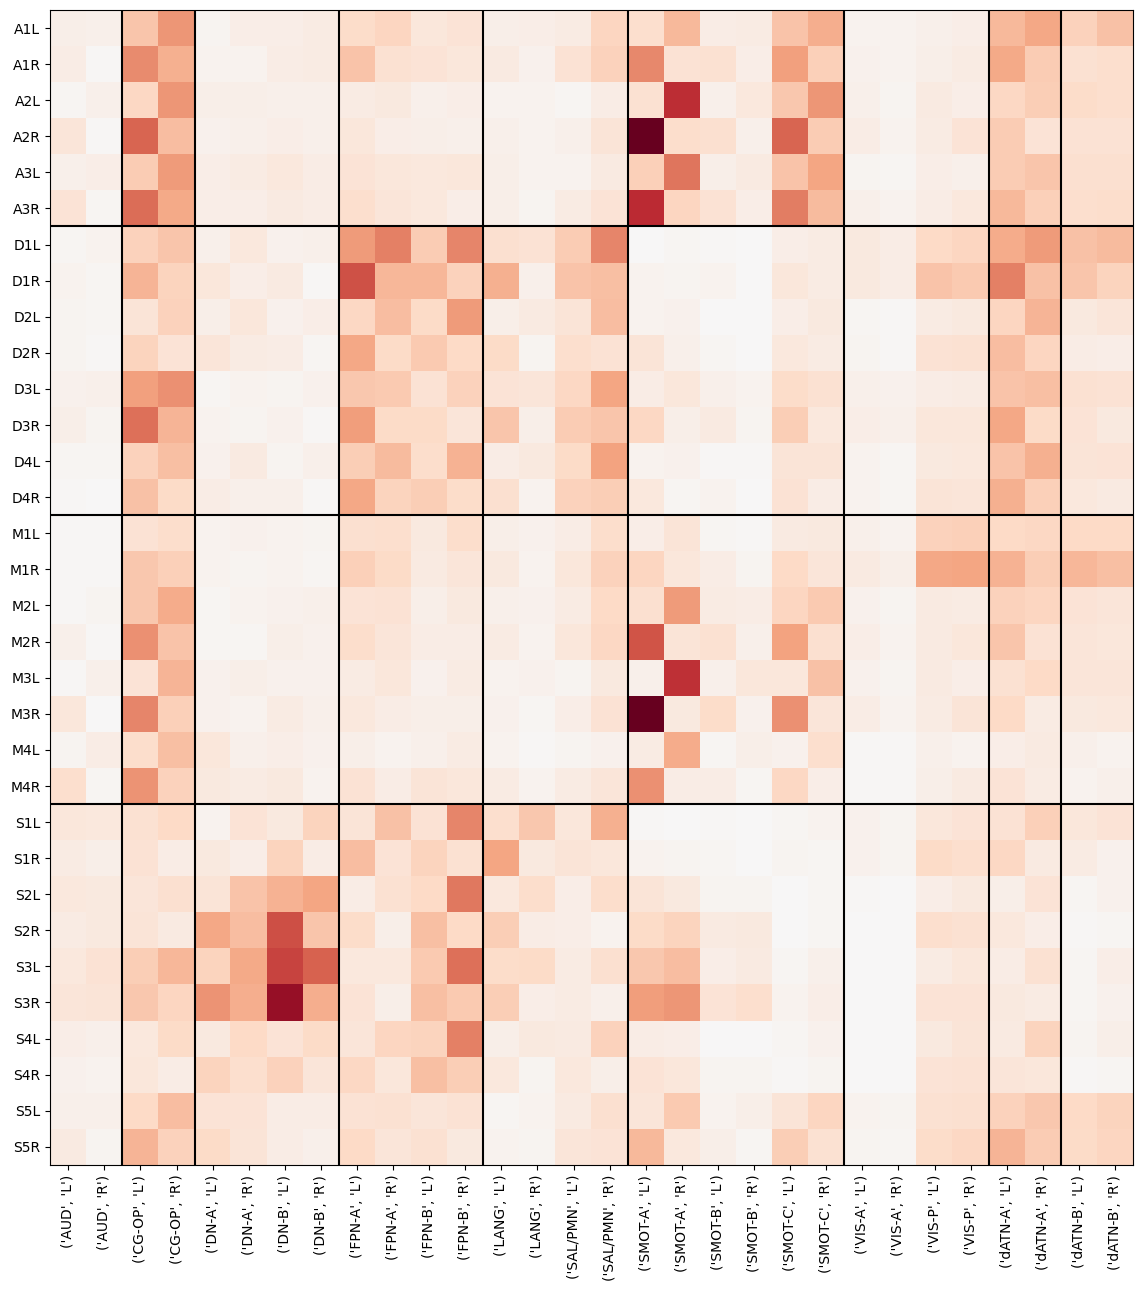

In [37]:
# Generate a table of weights split by hemisphere 
W = pd.pivot_table(T,index='cereb_region', columns=['fs_region','hemisphere'], values='totalW')
plt.figure(figsize=(15,15))
plt.imshow(W.values,cmap='RdBu_r', vmin=-W.values.max(), vmax=W.values.max())
ax=plt.gca()
x1=ax.set_xticks(range(len(W.columns)))
ax.set_xticklabels(W.columns,rotation=90)
x2=ax.set_yticks(range(len(W.index)))
ax.set_yticklabels(W.index)
hlines = [5.5,13.5,21.5]
vlines = [1.5,3.5,7.5,11.5,15.5,21.5,25.5,27.5]
for h in hlines:
    ax.axhline(h,color='k')
for v in vlines:
    ax.axvline(v,color='k')

if Path(ut.figure_dir).exists():
    plt.savefig(f'{ut.figure_dir}/cortical_connectivity_MSHBM15_hem.pdf')

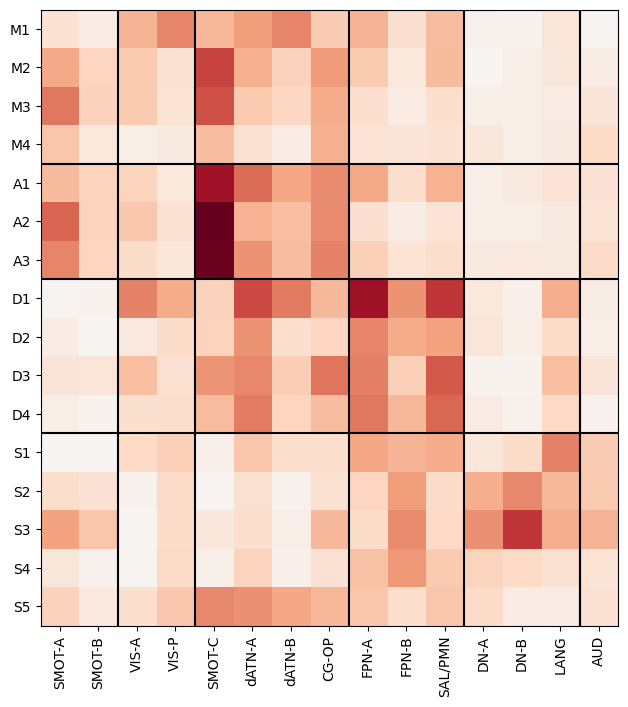

In [38]:
# Generate a table of mean weights across cortical region
T['cereb_region2'] = [c[:2] for c in T.cereb_region]
W = pd.pivot_table(T,index='cereb_region2', columns='fs_region', values='weight',sort=False)

# Order of resting state networks: 
networks = ['SMOT-A','SMOT-B','VIS-A','VIS-P','SMOT-C','dATN-A','dATN-B','CG-OP','FPN-A','FPN-B','SAL/PMN','DN-A','DN-B','LANG','AUD']
# SMOT-C is Premotor-Posterior Parietal Rostral (PM-PPr) in Du, ..., & Buckner 2023
W = W[networks]
plt.figure(figsize=(8,8))
plt.imshow(W.values,cmap='RdBu_r', vmin=-W.values.max(), vmax=W.values.max())
ax=plt.gca()
x1=ax.set_xticks(range(len(W.columns)))
ax.set_xticklabels(labels=W.columns,rotation=90)
x2=ax.set_yticks(range(len(W.index)))
ax.set_yticklabels(labels=W.index)
hlines = [3.5,6.5,10.5]
vlines = [1.5,3.5,7.5,10.5,13.5,13.5]
for h in hlines:
    ax.axhline(h,color='k')
for v in vlines:
    ax.axvline(v,color='k')

if Path(ut.figure_dir).exists():
    plt.savefig(f'{ut.figure_dir}/cortical_connectivity_MSHBM15.pdf')
else:
    plt.savefig(
        f'{ut.base_dir}/lost_and_found/cortical_connectivity_yeo.pdf')



In [34]:

W.values.max()
# W.values.min()

0.0011790506635797479

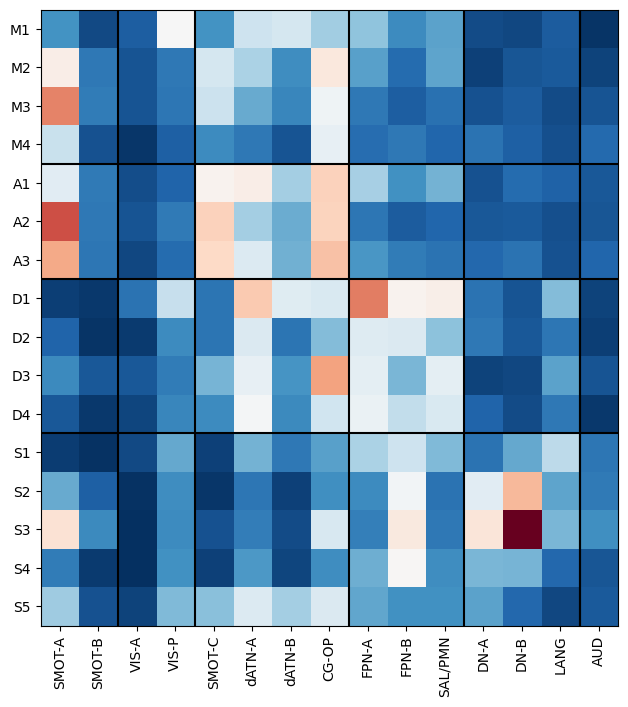

In [5]:
# Generate a table of the sum of the weights across cortical regions (larger cortical regions will have a higher weight)
# This plot is not used in the paper
T['cereb_region2'] = [c[:2] for c in T.cereb_region]
W = pd.pivot_table(T,index='cereb_region2', columns='fs_region', values='totalW',sort=False)

# Order of resting state networks: 
networks = ['SMOT-A','SMOT-B','VIS-A','VIS-P','SMOT-C','dATN-A','dATN-B','CG-OP','FPN-A','FPN-B','SAL/PMN','DN-A','DN-B','LANG','AUD']
W = W[networks]
plt.figure(figsize=(8,8))
plt.imshow(W.values,cmap='RdBu_r')
ax=plt.gca()
x1=ax.set_xticks(range(len(W.columns)))
ax.set_xticklabels(labels=W.columns,rotation=90)
x2=ax.set_yticks(range(len(W.index)))
ax.set_yticklabels(labels=W.index)
hlines = [3.5,6.5,10.5]
vlines = [1.5,3.5,7.5,10.5,13.5,13.5]
for h in hlines:
    ax.axhline(h,color='k')
for v in vlines:
    ax.axvline(v,color='k')